In [6]:
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pprint import pprint

# importing the QISKit
from qiskit import QuantumProgram
import Qconfig

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [7]:
zero = np.array([[1],[0]])
one = np.array([[0],[1]])

X = np.array([[0,1],[1,0]])
print(np.dot(X,zero))
print(np.dot(X,one))

In [10]:
backend = 'ibmqx2'
shots = 1024

qp = QuantumProgram()
qp.set_api(Qconfig.APIToken, Qconfig.config['url'])

In [12]:
# create the registers
quantumRegister = qp.create_quantum_register('quantumRegister', 1)
classicalRegister = qp.create_classical_register('classicalRegister', 1)

# quantum ground circuit
quantumCircuitGround = qp.create_circuit('ground', [quantumRegister], [classicalRegister])
quantumCircuitGround.measure(quantumRegister[0], classicalRegister[0])

# quantum exicted circuit
quantumCircuitExcited = qp.create_circuit('excited', [quantumRegister], [classicalRegister])
# perform Pauli X (classical NOT gate for classical computers)
quantumCircuitExcited.x(quantumRegister)
quantumCircuitExcited.measure(quantumRegister[0], classicalRegister[0])


circuits = ['ground', 'excited']

qp.get_qasms(circuits)

['OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg quantumRegister[1];\ncreg classicalRegister[1];\nmeasure quantumRegister[0] -> classicalRegister[0];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg quantumRegister[1];\ncreg classicalRegister[1];\nx quantumRegister[0];\nmeasure quantumRegister[0] -> classicalRegister[0];\n']

Here we have created two jobs with different quantum circuits; the first to prepare the ground state, and the second to prepare the excited state. Now we can run the batched jobs on the QX.

In [15]:
result = qp.execute(circuits, backend=backend, shots=shots, max_credits=3, wait=10, timeout=240, silent=False)

running on backend: ibmqx2
status = RUNNING (10 seconds)
status = RUNNING (20 seconds)


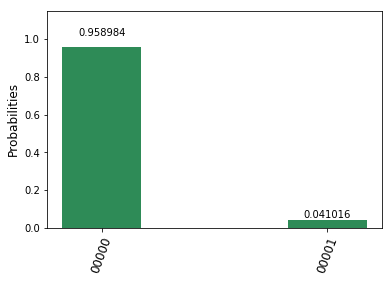

In [18]:
plot_histogram(result.get_counts('ground'))

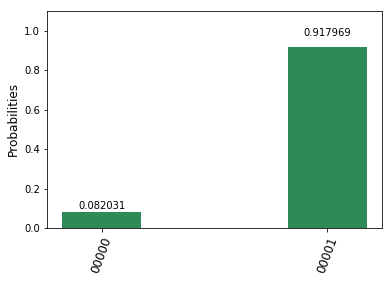

In [17]:
plot_histogram(result.get_counts('excited'))

Let's run the quantum version of this experiment. First we prepare the qubit in the ground state |0⟩
. We then apply the Hadamard gate (coin flip). Finally, we measure the state of the qubit. Repeat the experiment 1024 times (shots). As you likely predicted, half the outcomes will be in the |0⟩
 state and half will be in the |1⟩
 state.

running on backend: ibmqx2
status = RUNNING (10 seconds)
status = RUNNING (20 seconds)


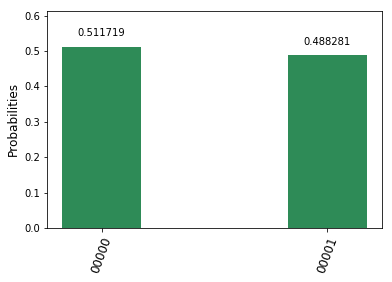

In [19]:
quantumCircuitSuperposition = qp.create_circuit('superposition', [quantumRegister], [classicalRegister])

# (.h) is Hadamard gate (coin flip)
quantumCircuitSuperposition.h(quantumRegister)
quantumCircuitSuperposition.measure(quantumRegister[0], classicalRegister[0])

circuits = ['superposition']
result = qp.execute(circuits, backend=backend, shots=shots, max_credits=3, wait=10, timeout=240, silent=False)

plot_histogram(result.get_counts('superposition'))

Indeed, much like a coin flip, the results are close to 50/50 with some non-ideality due to errors (again due to state preparation, measurement, and gate errors). So far, this is still not unexpected. Let's run the experiment again, but this time with two H
 gates in succession. If we consider the H
 gate to be analog to a coin flip, here we would be flipping it twice, and still expecting a 50/50 distribution.

running on backend: ibmqx2
status = RUNNING (10 seconds)
status = RUNNING (20 seconds)


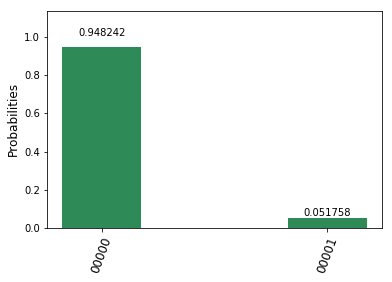

In [21]:
quantumCircuitTwoHadamard = qp.create_circuit('twohadamard', [quantumRegister], [classicalRegister])
quantumCircuitTwoHadamard.h(quantumRegister)
quantumCircuitTwoHadamard.barrier()
quantumCircuitTwoHadamard.h(quantumRegister)
quantumCircuitTwoHadamard.measure(quantumRegister[0], classicalRegister[0])

circuits = ["twohadamard"]
result = qp.execute(circuits, backend=backend, shots=shots, max_credits=3, wait=10, timeout=240, silent=False)

plot_histogram(result.get_counts('twohadamard'))

In [22]:
state_overlap = lambda state1, state2: np.absolute(np.dot(state1.conj().T,state2))**2

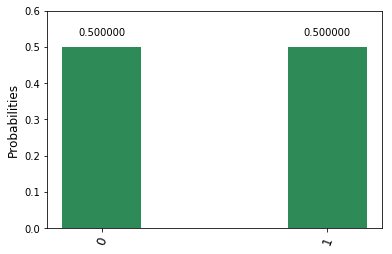

In [26]:
Hadamard = np.array([[1,1], [1,-1]], dtype=complex)/np.sqrt(2)
psil = np.dot(Hadamard, zero)
P0 = state_overlap(zero, psil)
P1 = state_overlap(one, psil)

plot_histogram({'0' : P0, '1' : P1})

In [27]:
print(np.dot(Hadamard, zero))
print(np.dot(Hadamard, one))

[[ 0.70710678+0.j]
 [ 0.70710678+0.j]]
[[ 0.70710678+0.j]
 [-0.70710678+0.j]]
